In [1]:
#Multi-class Classification
import zipfile
import nibabel as nib
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import glob
from torch.autograd import Variable
from torchvision import models
from torch.nn import Module,  Linear, ReLU, CrossEntropyLoss, Sequential, Conv3d, MaxPool3d, Softmax, BatchNorm3d
from torch.optim import Adam
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import seaborn as sn
import torch.optim as optim
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
sample = glob.glob(r'D:\Master_Thesis_DZNE\Dataset_FTD\NIFD-20220204T163127Z-001\NIFD\CN\mwp1sub-NIFD1S0019_ses-M00_T1w.nii')
CNsamples=sample
CNfiles=len(CNsamples)
print('Found ', str(Adfiles), ' nifti files')

In [31]:
CN_img = nib.load(r'D:\Master_Thesis_DZNE\Dataset_FTD\NIFD-20220204T163127Z-001\NIFD\CN\mwp1sub-NIFD1S0019_ses-M00_T1w.nii')
CN_img_data = CN_img.get_fdata()
CN_img_data.shape

(121, 145, 121)

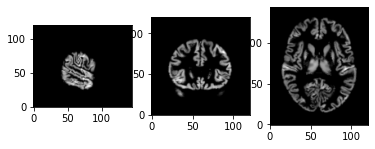

In [33]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
slice_0 = CN_img_data[100, :, :]
slice_1 = CN_img_data[:, 100, :]
slice_2 = CN_img_data[:, :, 55]
show_slices([slice_0, slice_1, slice_2])

In [7]:
#Loading files using Nibabel library
x_range_from = 10; x_range_to = 110
y_range_from = 10; y_range_to = 130
z_range_from = 5; z_range_to = 105

CN_images= np.zeros((Adfiles, z_range_to-z_range_from, x_range_to-x_range_from, y_range_to-y_range_from, 1), dtype=np.float32)

for i in range(CNfiles): # Loading files
  if (i % 10 == 0):
    print('Loading file %d of %d' % (i+1, Adfiles))
  img = nib.load(CNsamples[i])
  img =  img.get_fdata()[x_range_from:x_range_to, y_range_from:y_range_to, z_range_from:z_range_to]
  img= np.transpose(img, (2,0,1))
  img = np.flip(img)
  CN_images[i,:,:,:,0] = np.nan_to_num(img)
print('The shape of an image', CN_images.shape)

Loading file 1 of 1
The shape of an image (1, 100, 100, 120, 1)


# Display CN_FT Sample

(100, 100, 120)
Display an image ['D:\\Master_Thesis_DZNE\\Dataset_FTD\\NIFD-20220204T163127Z-001\\NIFD\\CN\\mwp1sub-NIFD1S0019_ses-M00_T1w.nii']
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120


<ipython-input-17-91623f41609f>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(),


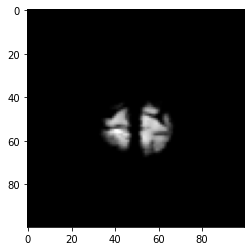

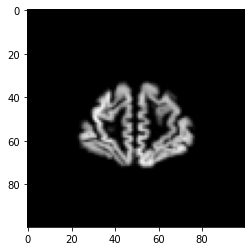

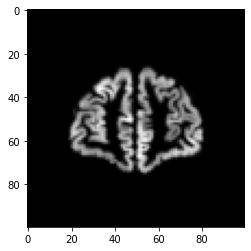

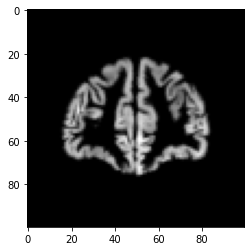

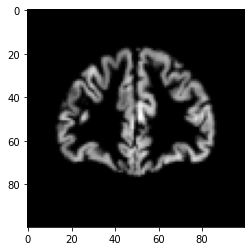

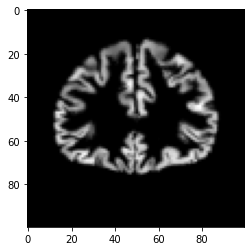

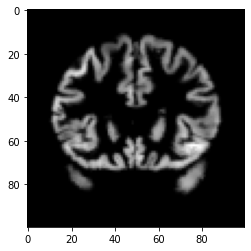

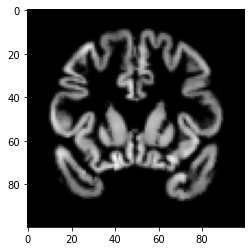

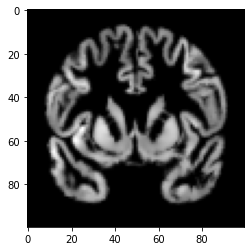

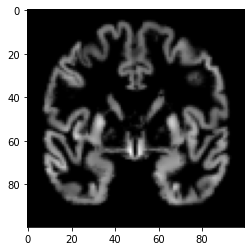

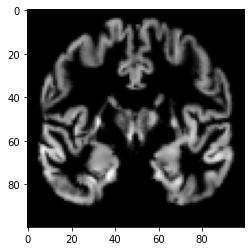

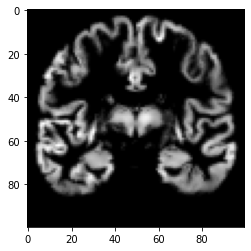

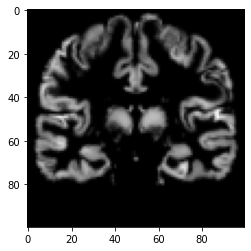

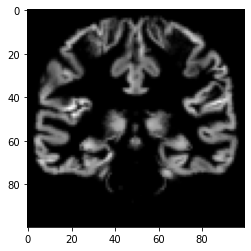

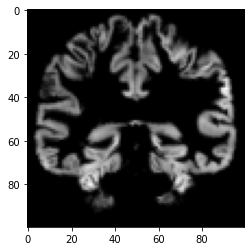

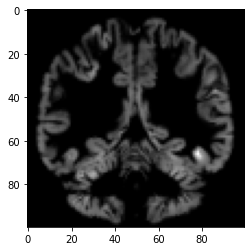

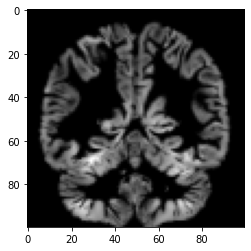

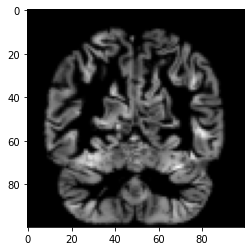

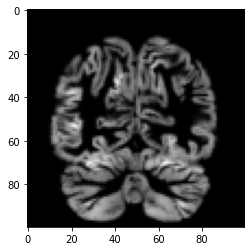

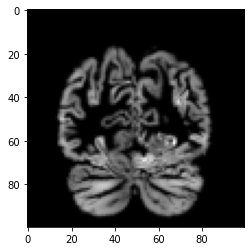

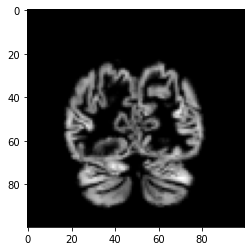

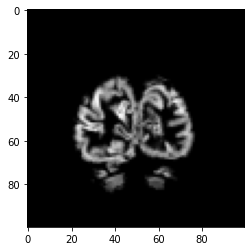

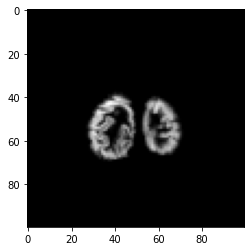

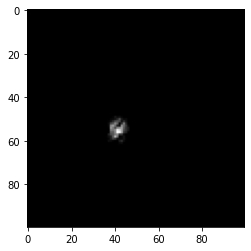

In [17]:
sample_image= CN_images[0,:,:,:,0]
print(sample_image.shape)
print('Display an image', Adsamples)
#print(sample_image[0:20:30])
for i in range(sample_image.shape[2]):
    print(sample_image.shape[2])
    if (i % 5 == 0):
        plt.figure(),
        s=sample_image[:,:,i]
        plt.imshow(s, cmap='gray');

# Second CN_FT Sample

In [18]:
sample = glob.glob(r'D:\Master_Thesis_DZNE\Dataset_FTD\NIFD-20220204T163127Z-001\NIFD\CN\mwp1sub-NIFD1S0019_ses-M00_T1w.nii')
CNsamples=sample
CNfiles=len(CNsamples)
print('Found ', str(Adfiles), ' nifti files')

Found  1  nifti files


In [19]:
#Loading files using Nibabel library
x_range_from = 10; x_range_to = 110
y_range_from = 40; y_range_to = 95
z_range_from = 5; z_range_to = 105

CN_images= np.zeros((Adfiles, z_range_to-z_range_from, x_range_to-x_range_from, y_range_to-y_range_from, 1), dtype=np.float32)

for i in range(CNfiles): # Loading files
  if (i % 10 == 0):
    print('Loading file %d of %d' % (i+1, Adfiles))
  img = nib.load(CNsamples[i])
  img =  img.get_fdata()[x_range_from:x_range_to, y_range_from:y_range_to, z_range_from:z_range_to]
  img= np.transpose(img, (2,0,1))
  img = np.flip(img)
  CN_images[i,:,:,:,0] = np.nan_to_num(img)
print('The shape of an image', CN_images.shape)

Loading file 1 of 1
The shape of an image (1, 100, 100, 55, 1)


(100, 100, 55)
Display an image ['D:\\Master_Thesis_DZNE\\Dataset_FTD\\NIFD-20220204T163127Z-001\\NIFD\\CN\\mwp1sub-NIFD1S0019_ses-M00_T1w.nii']
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55


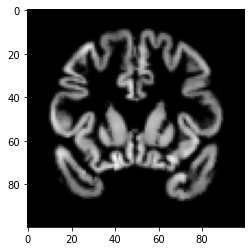

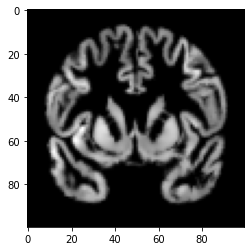

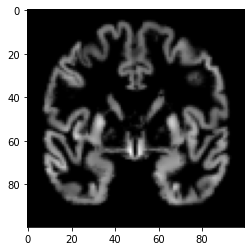

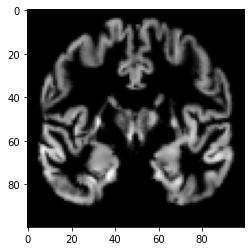

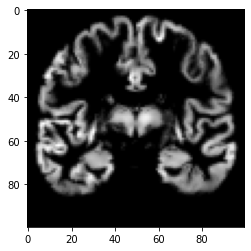

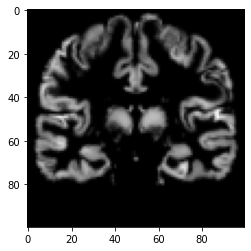

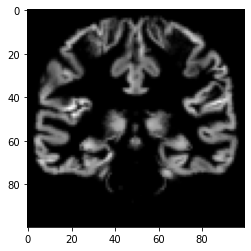

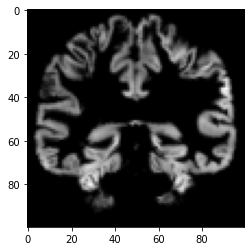

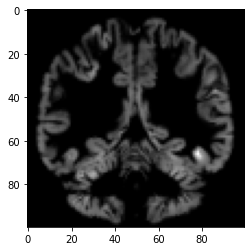

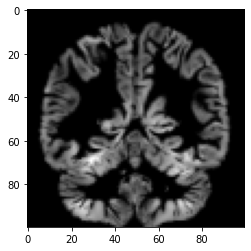

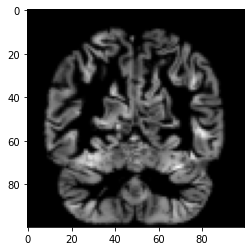

In [21]:
sample_image= CN_images[0,:,:,:,0]
print(sample_image.shape)
print('Display an image', Adsamples)
#print(sample_image[0:20:30])
for i in range(sample_image.shape[2]):
    print(sample_image.shape[2])
    if (i % 5 == 0):
        plt.figure(),
        s=sample_image[:,:,i]
        plt.imshow(s, cmap='gray');

# Display FTD Sample

In [22]:
samples = glob.glob(r'D:\Master_Thesis_DZNE\Dataset_FTD\NIFD-20220204T163127Z-001\NIFD\FTD_Dataset\FTD\mwp1sub-NIFD1S0002_ses-M00_T1w.nii')
FTD_samples=samples
FTDfiles=len(FTD_samples)
print('Found ', str(FTDfiles), ' nifti files')

Found  1  nifti files


In [23]:
#Loading files using Nibabel library
x_range_from = 10; x_range_to = 110
y_range_from = 10; y_range_to = 130
z_range_from = 5; z_range_to = 105

FTD_images= np.zeros((Adfiles, z_range_to-z_range_from, x_range_to-x_range_from, y_range_to-y_range_from, 1), dtype=np.float32)

for i in range(FTDfiles): # Loading files
  if (i % 10 == 0):
    print('Loading file %d of %d' % (i+1, FTDfiles))
  img = nib.load(FTD_samples[i])
  img =  img.get_fdata()[x_range_from:x_range_to, y_range_from:y_range_to, z_range_from:z_range_to]
  img= np.transpose(img, (2,0,1))
  img = np.flip(img)
  FTD_images[i,:,:,:,0] = np.nan_to_num(img)
print('The shape of an image', FTD_images.shape)

Loading file 1 of 1
The shape of an image (1, 100, 100, 120, 1)


(100, 100, 120)
Display an image ['D:\\Master_Thesis_DZNE\\Dataset_FTD\\NIFD-20220204T163127Z-001\\NIFD\\FTD_Dataset\\FTD\\mwp1sub-NIFD1S0002_ses-M00_T1w.nii']
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120


<ipython-input-25-693b2306b2fa>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(),


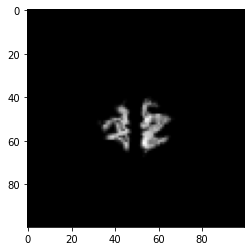

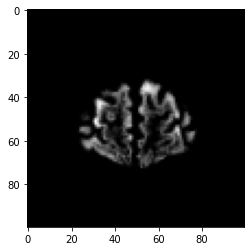

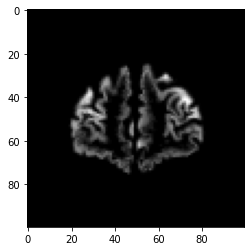

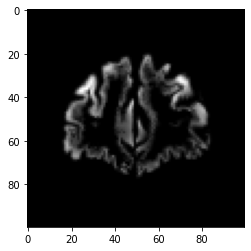

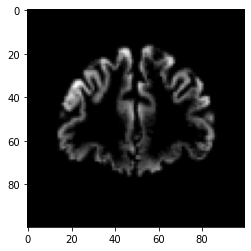

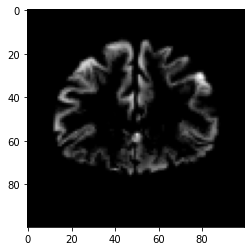

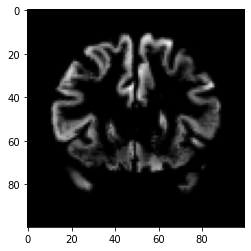

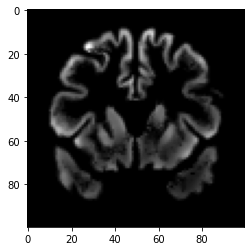

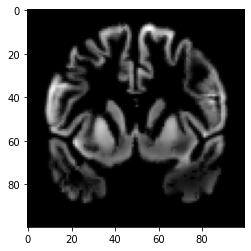

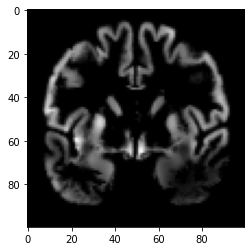

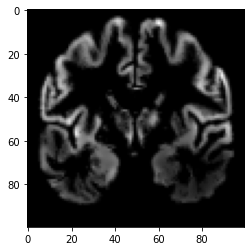

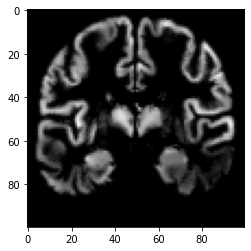

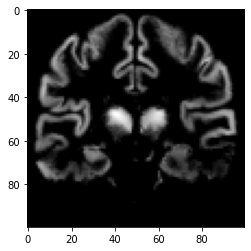

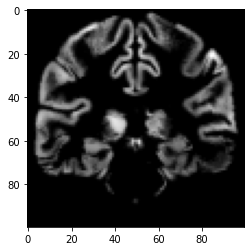

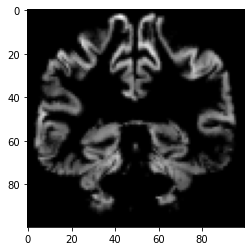

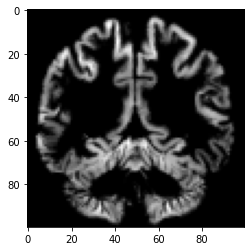

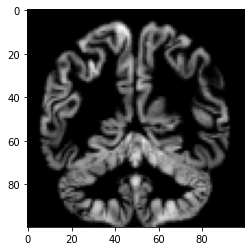

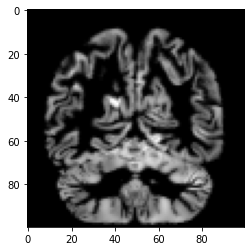

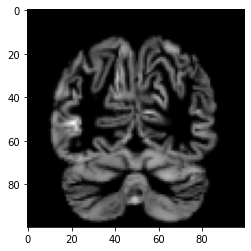

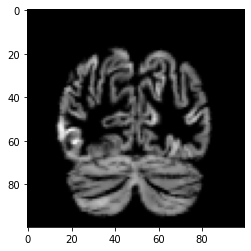

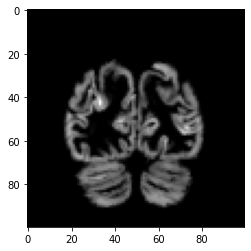

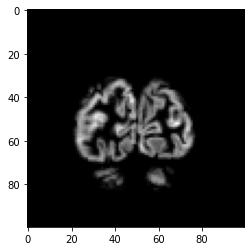

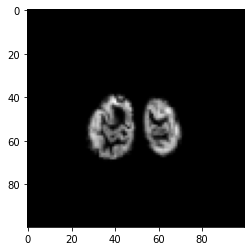

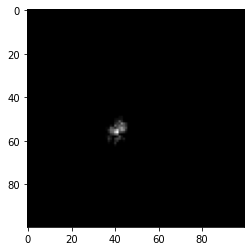

In [25]:
sample_image= FTD_images[0,:,:,:,0]
print(sample_image.shape)
print('Display an image', FTD_samples)
#print(sample_image[0:20:30])
for i in range(sample_image.shape[2]):
    print(sample_image.shape[2])
    if (i % 5 == 0):
        plt.figure(),
        s=sample_image[:,:,i]
        plt.imshow(s, cmap='gray');

# Second FTD Sample

In [26]:
samples = glob.glob(r'D:\Master_Thesis_DZNE\Dataset_FTD\NIFD-20220204T163127Z-001\NIFD\FTD_Dataset\FTD\mwp1sub-NIFD1S0003_ses-M00_T1w.nii')
FTD_samples=samples
FTDfiles=len(FTD_samples)
print('Found ', str(FTDfiles), ' nifti files')

Found  1  nifti files


In [27]:
#Loading files using Nibabel library
x_range_from = 10; x_range_to = 110
y_range_from = 40; y_range_to = 95
z_range_from = 5; z_range_to = 105

FTD_images= np.zeros((Adfiles, z_range_to-z_range_from, x_range_to-x_range_from, y_range_to-y_range_from, 1), dtype=np.float32)

for i in range(FTDfiles): # Loading files
  if (i % 10 == 0):
    print('Loading file %d of %d' % (i+1, FTDfiles))
  img = nib.load(FTD_samples[i])
  img =  img.get_fdata()[x_range_from:x_range_to, y_range_from:y_range_to, z_range_from:z_range_to]
  img= np.transpose(img, (2,0,1))
  img = np.flip(img)
  FTD_images[i,:,:,:,0] = np.nan_to_num(img)
print('The shape of an image', FTD_images.shape)

Loading file 1 of 1
The shape of an image (1, 100, 100, 55, 1)


(100, 100, 55)
Display an image ['D:\\Master_Thesis_DZNE\\Dataset_FTD\\NIFD-20220204T163127Z-001\\NIFD\\FTD_Dataset\\FTD\\mwp1sub-NIFD1S0003_ses-M00_T1w.nii']
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55


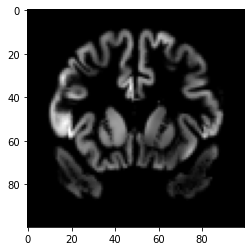

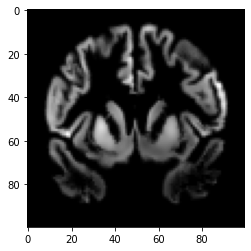

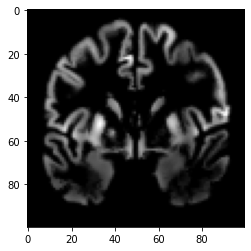

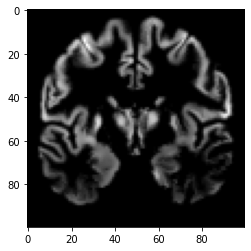

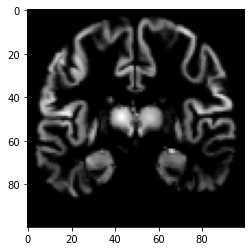

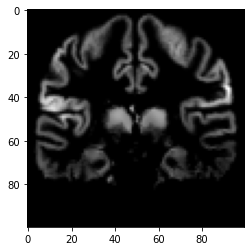

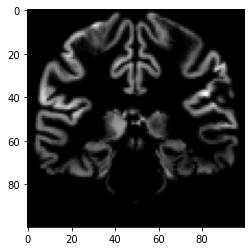

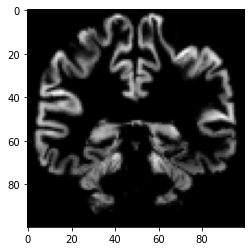

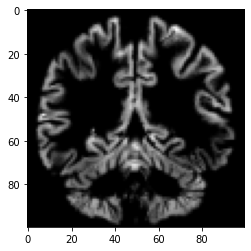

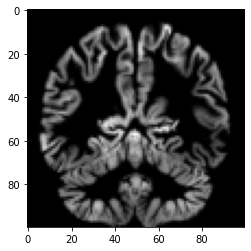

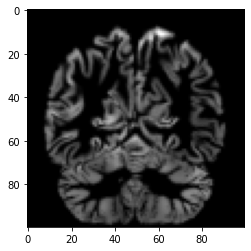

In [28]:
sample_image= FTD_images[0,:,:,:,0]
print(sample_image.shape)
print('Display an image', FTD_samples)
#print(sample_image[0:20:30])
for i in range(sample_image.shape[2]):
    print(sample_image.shape[2])
    if (i % 5 == 0):
        plt.figure(),
        s=sample_image[:,:,i]
        plt.imshow(s, cmap='gray');

In [34]:
FTD_img = nib.load(r'D:\Master_Thesis_DZNE\Dataset_FTD\NIFD-20220204T163127Z-001\NIFD\FTD_Dataset\FTD\mwp1sub-NIFD1S0002_ses-M00_T1w.nii')
FTD_img_data = FTD_img.get_fdata()
FTD_img_data.shape

(121, 145, 121)

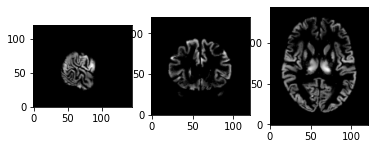

In [36]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
slice_0 = FTD_img_data[100, :, :]
slice_1 = FTD_img_data[:, 100, :]
slice_2 = FTD_img_data[:, :, 55]
show_slices([slice_0, slice_1, slice_2])